### Most used links

> - course wiki [link](http://wiki.fast.ai/index.php/Main_Page)
- aws billing [link](https://console.aws.amazon.com/billing/home?region=us-west-2#/bill?year=2016&month=12)
- course nbs [link](https://github.com/fastai/courses/tree/master/deeplearning1/nbs)

## state-farm-distracted-driver-detection

#### Which kg competition is taking

In this tutorial, you will learn how generate and **submit predictions to a Kaggle competiton**

[state-farm-distracted-driver-detection](https://www.kaggle.com/c/state-farm-distracted-driver-detection)
    
    

#### Dataset and file structure

To start you will need to download and unzip the competition data from Kaggle and ensure your directory structure looks like this
```
utils/
    vgg16.py
    utils.py
lesson1/
    redux.ipynb
    data/
        statefarm/
            train/
                c0
                c1
                ...
                c9
            test/
                231.jpg
                325.jpg
                1235.jpg
                9923.jpg
```

You can download the data files from the competition page [here](https://www.kaggle.com/c/state-farm-distracted-driver-detection/data) or you can download them from the command line using the [Kaggle CLI](https://github.com/floydwch/kaggle-cli).

You should launch your notebook inside the lesson1 directory
```
cd lesson1
jupyter notebook
```

#### Configure kaggle and download data

download it during the night, and in the morning it should be done

In [ ]:
%pwd
# %cd data
# %mkdir stateFarm
# %cd stateFarm/
# %kg config -g -u danielliao -p @F -c dogs-vs-cats-redux-kernels-edition
# !kg download -u danielliao -p @F -c state-farm-distracted-driver-detection

Starting new HTTPS connection (1): www.kaggle.com
Starting new HTTPS connection (1): www.kaggle.com
downloading https://www.kaggle.com/c/state-farm-distracted-driver-detection/download/sample_submission.csv.zip
Starting new HTTPS connection (1): kaggle2.blob.core.windows.net
downloading https://www.kaggle.com/c/state-farm-distracted-driver-detection/download/imgs.zip
Starting new HTTPS connection (1): kaggle2.blob.core.windows.net


#### create convenient variables for lesson_dir and data_dir

In [70]:
#Verify we are in the lesson1 directory
%pwd
%cd ..

/Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1


In [71]:
#Create references to important directories we will use over and over
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir + '/data/stateFarm'

In [72]:
print LESSON_HOME_DIR
DATA_HOME_DIR

/Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1


'/Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1/data/stateFarm'

## Import all functions at once using utils.py and vgg16.py

#### Make sure current directory is at lesson level

In [5]:
%pwd
# %cd ..

u'/Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1'

#### import all functions at once

In [6]:
# all modules should be imported properly, unless the library needs update
# utils functions are stored in utils folder for management 

%cd utils
from utils import *
from vgg16 import Vgg16
%cd ..

#Instantiate plotting tool
#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline

/Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1/utils
/Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1


Using Theano backend.


## Action Plan to take kg competition

1. Create Validation and Sample sets
2. Rearrange image files into their respective directories 
3. Finetune and Train model
4. Generate predictions
5. Validate predictions
6. Submit predictions to Kaggle

## Create validation set and sample

#### Create folder structures

```
data
    statefarm
        train
            c0
            c1
            ...
            c9
        valid
            c0
            c1
            ...
            c9
        results
        test
            unknown
        sample
            train
                c0
                c1
                ...
                c9
            test/unknown
            valid
                c0
                c1
                ...
                c9
            results

```

In [17]:
# # Create directories as displayed above
# %cd data/stateFarm
# %mkdir valid
# %mkdir results
# %mkdir -p sample/train
# %mkdir -p sample/train/c0
# %mkdir -p sample/train/c1
# %mkdir -p sample/train/c2
# %mkdir -p sample/train/c3
# %mkdir -p sample/train/c4
# %mkdir -p sample/train/c5
# %mkdir -p sample/train/c6
# %mkdir -p sample/train/c7
# %mkdir -p sample/train/c8
# %mkdir -p sample/train/c9
# %mkdir -p sample/test
# %mkdir -p sample/test/unknown
# %mkdir -p sample/valid
# %mkdir -p sample/valid/c0
# %mkdir -p sample/valid/c1
# %mkdir -p sample/valid/c2
# %mkdir -p sample/valid/c3
# %mkdir -p sample/valid/c4
# %mkdir -p sample/valid/c5
# %mkdir -p sample/valid/c6
# %mkdir -p sample/valid/c7
# %mkdir -p sample/valid/c8
# %mkdir -p sample/valid/c9
# %mkdir -p sample/results
# %mkdir -p test/unknown
# %find redux/test/ -type d   # check whether test folder has unknown folder or not 

#### go to train folder and randomize the order of images

In [18]:
%pwd
%cd /Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1/data/stateFarm/train/c0

/Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1/data/stateFarm/train/c0


In [19]:
# get path name for all images in train folder
g = glob('*.jpg')
print g[-5:]
g[:5]

['img_99715.jpg', 'img_99779.jpg', 'img_99785.jpg', 'img_99846.jpg', 'img_99971.jpg']


['img_100026.jpg',
 'img_10003.jpg',
 'img_100050.jpg',
 'img_100074.jpg',
 'img_10012.jpg']

In [20]:
# randomize the order of images
shuf = np.random.permutation(g)
shuf[:5]

array(['img_93904.jpg', 'img_80621.jpg', 'img_46484.jpg', 'img_32299.jpg', 'img_42336.jpg'], 
      dtype='|S14')

#### Move 500 shuffled images from train folder to sample/valid folder

In [102]:
%cd /Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1/data/stateFarm/train/c9
%pwd
%ls |wc -l

/Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1/data/stateFarm/train/c9
    1929


In [103]:
DATA_HOME_DIR

'/Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1/data/stateFarm'

In [104]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50):
    os.rename(shuf[i], DATA_HOME_DIR + '/sample/train/c9/' + shuf[i])

**repeat** above for another 9 times for valid folder for c0 to c9

#### Copy 200 shuffled images from train folder to sample/train folder (not yet)

In [ ]:
from shutil import copyfile

In [ ]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(200):
    copyfile(shuf[i], DATA_HOME_DIR + '/sample/train/' + shuf[i])

#### copy 100 images to from train/ to sample/valid/ folders

In [126]:
%cd /Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1/data/stateFarm/train/c9
%pwd
%ls |wc -l

/Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1/data/stateFarm/train/c9
    1879


In [127]:
from shutil import copyfile
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(10): copyfile(shuf[i], DATA_HOME_DIR+'/sample/valid/c9/' + shuf[i])

repeat it 10 times for 10 different folders

#### Go to test folder, and copy 20 shuffled images to sample/test/unknown/ folder

In [132]:
%cd $DATA_HOME_DIR/test
%ls |wc -l

/Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1/data/stateFarm/test
   79727


In [133]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(20): copyfile(shuf[i], DATA_HOME_DIR+'/sample/test/unknown/' + shuf[i])

#### Rearrange image files into their respective directories (not yet)

In [ ]:
#Divide cat/dog images into separate directories
# as images are shuffled, number of cats and number of dogs are not necessarily equal

%cd $DATA_HOME_DIR/sample/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_HOME_DIR/sample/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_HOME_DIR/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_HOME_DIR/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/


In [ ]:
# Create single 'unknown' class for test set
%cd $DATA_HOME_DIR/test
%mv *.jpg unknown/

## Finetuning and Training

#### Create convenient variables of data path for Full dataset or Sample set

In [134]:
%cd $DATA_HOME_DIR

/Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1/data/stateFarm


In [135]:
#Set path to sample/ path if desired
# path = DATA_HOME_DIR + '/'
path = DATA_HOME_DIR + '/sample'
test_path = path + '/test/' #We use all the test data
results_path=path + '/results/'
train_path=path + '/train/'
valid_path=path + '/valid/'
valid_path

'/Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1/data/stateFarm/sample/valid/'

#### Import Vgg16 class and create an object to use

In [136]:
#import Vgg16 helper class
vgg = Vgg16()

/Users/Natsume/miniconda2/envs/ml/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


### Finetune model with catsdogs train dataset

#### Experiments on batch_size and no_of_epoch

As no_of_epoch increases, performance may better or worse or fluctuate

In [137]:
#Set constants. You can experiment with no_of_epochs to improve the model
batch_size=3 # it was 64, but 64 may be too large for local mac
no_of_epochs=3

#### Get train and valid data into batches

In [138]:
#Finetune the model
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size) # it was batch_size * 2, not sure why

Found 500 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


#### Finetune model on batched train set

In [139]:
vgg.finetune(batches)

#### Set optimizer learning rate: maybe change the rate in the middle of epoches

In [140]:
#Not sure if we set this for all fits
vgg.model.optimizer.lr = 0.01

#### Fit the model with both Train and Valid sets and see how well it performs

> - Notice we are passing in the validation dataset to the fit() method
- For each epoch we test our model against the validation set

In [141]:
latest_weights_filename = None

# run fit a few epoches seperately not all at once
for epoch in range(no_of_epochs):
    print "Running epoch: %d" % epoch
    vgg.fit(batches, val_batches, nb_epoch=1)
    
    # name each fit 
    latest_weights_filename = 'ft%d.h5' % epoch
    
    # save each fit's weight
    vgg.model.save_weights(results_path+latest_weights_filename)
    
print "Completed %s fit operations" % no_of_epochs

Running epoch: 0
Epoch 1/1
500/500 [==============================] - 294s - loss: 14.4911 - acc: 0.0940 - val_loss: 14.5063 - val_acc: 0.1000
Running epoch: 1
Epoch 1/1
500/500 [==============================] - 293s - loss: 14.6030 - acc: 0.0940 - val_loss: 14.1839 - val_acc: 0.1200
Running epoch: 2
Epoch 1/1
500/500 [==============================] - 293s - loss: 14.6030 - acc: 0.0940 - val_loss: 13.8616 - val_acc: 0.1400
Completed 3 fit operations


#### why it seems in general valid_accuracy get better as epoch increases? 
- epoch is cross validation for deep learning? 

## Generate Predictions

Let's use our new model to make predictions on the test dataset

### Side Note

####  <span class="burk">`class_mode=None` is not working for data with categorical folders</span>

In [35]:
batches = vgg.get_batches(train_path, batch_size=batch_size, class_mode=None)

Found 200 images belonging to 2 classes.


### Predict test set

In [142]:
test_path

'/Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1/data/stateFarm/sample/test/'

> - under **redux/sample/test/unknown** folder is a <span class="burk">must</span>
- under **redux/test/unknown** folder is a <span class="burk">must</span>

#### get test set into batches

In [143]:
test_batches = vgg.get_batches(test_path, shuffle=False, batch_size=batch_size, class_mode=None)

Found 20 images belonging to 1 classes.


#### predict on batches

In [144]:
batches, preds = vgg.test(test_path, batch_size = batch_size)

Found 20 images belonging to 1 classes.


#### save predictions and image filenames into results_path

> - For every image, vgg.test() generates two probabilities 
- one is for cat, the other one is for dog, but which is for which?
- The rule is alphanumeric order: c is before d
- we can check it by viewing images

In [145]:
print preds[:5]

filenames = batches.filenames
print filenames[:5]

#Save our test results arrays so we can use them again later
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)

[[  1.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   1.4013e-45   0.0000e+00
    0.0000e+00   0.0000e+00   0.0000e+00]
 [  1.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   1.4013e-45   1.1770e-36   0.0000e+00
    0.0000e+00   0.0000e+00   0.0000e+00]
 [  1.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00
    0.0000e+00   0.0000e+00   0.0000e+00]
 [  1.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   5.6234e-38   0.0000e+00
    0.0000e+00   0.0000e+00   0.0000e+00]
 [  1.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   1.1875e-40   0.0000e+00
    0.0000e+00   0.0000e+00   0.0000e+00]]
['unknown/img_100091.jpg', 'unknown/img_11899.jpg', 'unknown/img_17407.jpg', 'unknown/img_27828.jpg', 'unknown/img_30731.jpg']


#### View images to verify first prediction column is cat, the second is dog

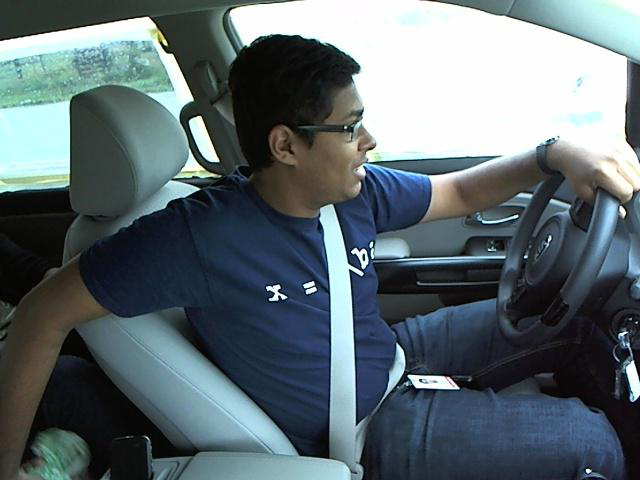

In [149]:
#You can verify the column ordering by viewing some images
# you will notice that when column_1 is 1, it is cat; when column_2 is 1, it is dog
from PIL import Image
Image.open(test_path + filenames[2])

## Validate Predictions

### Why and how to validate predictions in theory

#### Keras' fit function: loss function, accuracy, valid set

> - Keras' *fit()* function conveniently shows us the value of the loss function, and the accuracy, after every epoch ("*epoch*" refers to one full run through all training examples). 
- The most important metrics for us to look at are for the validation set, since we want to check for over-fitting. 

#### Make it overfitting first, reduce overfitting later on

> - **Tip**: with our first model we should try to overfit before we start worrying about how to reduce over-fitting - there's no point even thinking about regularization, data augmentation, etc if you're still under-fitting! (We'll be looking at these techniques shortly).

#### Check overfitting by examples

> As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
- A few correct labels at random
- A few incorrect labels at random
- The most correct labels of each class (ie those with highest probability that are correct)
- The most incorrect labels of each class (ie those with highest probability that are incorrect)
- The most uncertain labels (ie those with probability closest to 0.5).

> Let's see what we can learn from these examples. (In general, this is a particularly useful technique for debugging problems in the model. However, since this model is so simple, there may not be too much to learn at this stage.)

> Calculate predictions on validation set, so we can find correct and incorrect examples:

> How to improve model using the example image views above [video](https://www.youtube.com/watch?v=e3aM6XTekJc&feature=youtu.be&t=2437)

### Validate predictions on valid set

#### Load latest model saved

In [98]:
vgg.model.load_weights(results_path+latest_weights_filename)

#### Predict on sample/valid

In [99]:
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

Found 50 images belonging to 2 classes.


#### val_batches contains all filenames and classes of valid set

In [104]:
filenames = val_batches.filenames
expected_labels = val_batches.classes #0 or 1
print len(filenames)
print len(expected_labels)
print filenames[0:5]
print expected_labels[0:5]

50
50
['cats/cat.11419.jpg', 'cats/cat.11531.jpg', 'cats/cat.11852.jpg', 'cats/cat.1330.jpg', 'cats/cat.2014.jpg']
[0 0 0 0 0]


#### reverse predictions and class/label for dogs (origin: cats first, kaggle: want dogs first)

In [153]:
#Round our predictions to 0/1 to generate labels
our_predictions = probs[:,0] # first column: 1 as 100% cat, 0 as 100% dog
our_labels = np.round(1-our_predictions) # now 1 as dog, 0 as cat
print our_predictions[0:5]
print our_labels[0:5]

[  1.0000e+00   6.7353e-11   1.0000e+00   1.0000e+00   1.0000e+00]
[ 0.  1.  0.  0.  0.]


#### Prepare image-viewing function to see 4 images at once

In [112]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view at once
n_view = 4

#### How to use np.where to indexing correct labels

In [110]:
print type(np.where(our_labels==expected_labels))
np.where(our_labels==expected_labels)[0]

<type 'tuple'>


array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       48, 49])

#### Randomly select a few correctly predicted images to view, print prediction label too

Found 48 correct labels


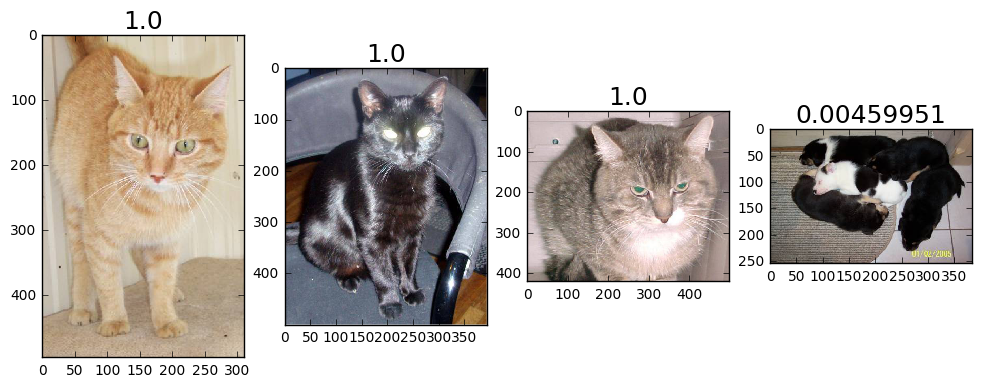

In [113]:
correct = np.where(our_labels==expected_labels)[0]
print "Found %d correct labels" % len(correct)
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

#### randomly select a few incorrectly predicted images

Found 2 incorrect labels


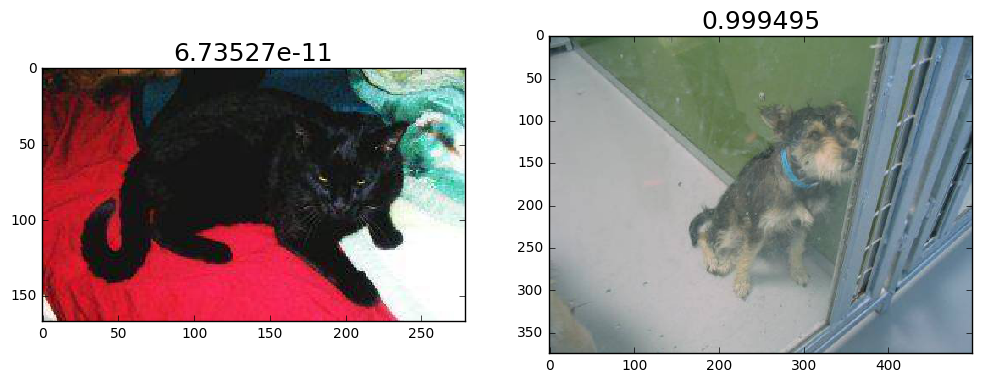

In [114]:
incorrect = np.where(our_labels!=expected_labels)[0]
print "Found %d incorrect labels" % len(incorrect)
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])

#### The images we most confident were cats, and are actually cats

Found 23 confident correct cats labels


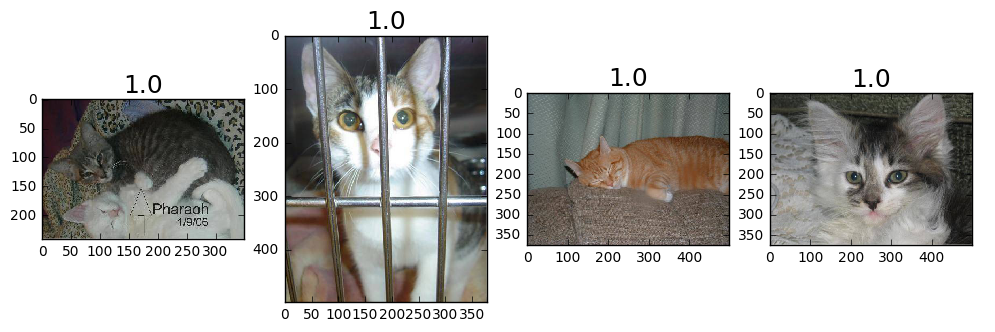

In [115]:
# our_labels == 0 meaning predict it to be a cat
# our_labels==expected_labels meaning: prediction matches true label

correct_cats = np.where((our_labels==0) & (our_labels==expected_labels))[0]
print "Found %d confident correct cats labels" % len(correct_cats)
most_correct_cats = np.argsort(our_predictions[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], our_predictions[correct_cats][most_correct_cats])

#### The images we most confident were dogs, and are actually dogs

Found 25 confident correct dogs labels


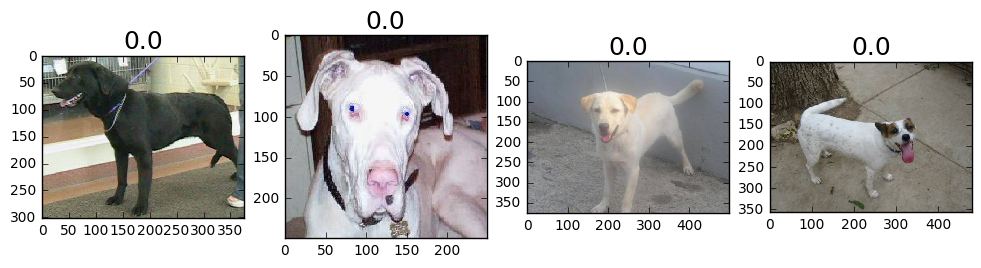

In [116]:
correct_dogs = np.where((our_labels==1) & (our_labels==expected_labels))[0]
print "Found %d confident correct dogs labels" % len(correct_dogs)
most_correct_dogs = np.argsort(our_predictions[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], our_predictions[correct_dogs][most_correct_dogs])

#### The images we were most confident were cats, but are actually dogs (predict to be cats, but we are wrong)

np.argsort: return index sorted

Found 1 incorrect cats


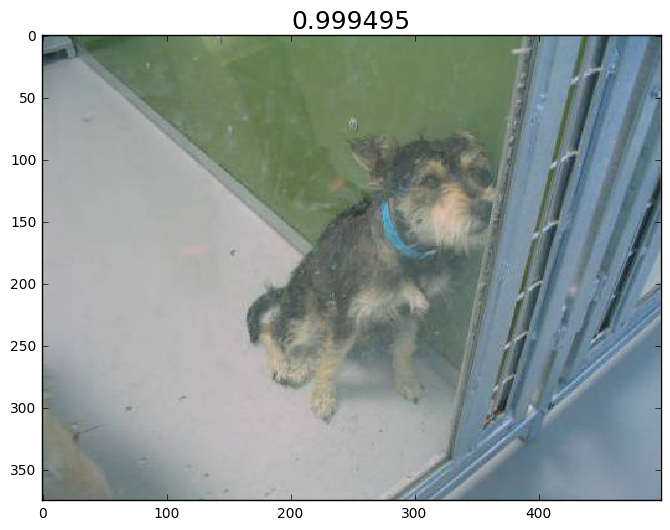

In [117]:
incorrect_cats = np.where((our_labels==0) & (our_labels!=expected_labels))[0]
print "Found %d incorrect cats" % len(incorrect_cats)
if len(incorrect_cats):
    most_incorrect_cats = np.argsort(our_predictions[incorrect_cats])[::-1][:n_view] 
    plots_idx(incorrect_cats[most_incorrect_cats], our_predictions[incorrect_cats][most_incorrect_cats])

#### The images we were most confident were dogs, but are actually cats

Found 1 incorrect dogs


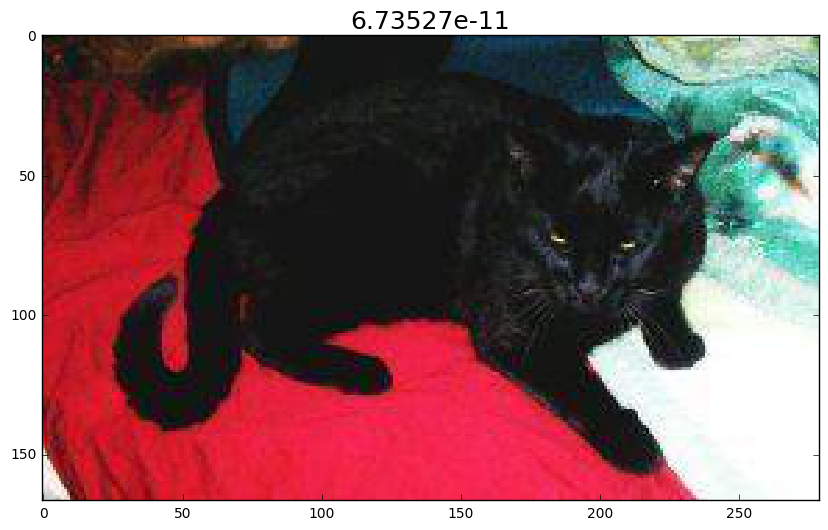

In [120]:
incorrect_dogs = np.where((our_labels==1) & (our_labels!=expected_labels))[0]
print "Found %d incorrect dogs" % len(incorrect_dogs)
if len(incorrect_dogs):
    most_incorrect_dogs = np.argsort(our_predictions[incorrect_dogs])[:n_view]
    plots_idx(incorrect_dogs[most_incorrect_dogs], our_predictions[incorrect_dogs][most_incorrect_dogs])

#### The most uncertain labels (ie those with probability closest to 0.5).

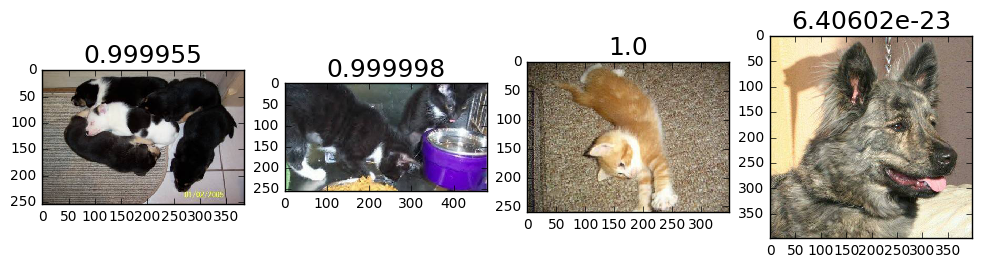

In [45]:
most_uncertain = np.argsort(np.abs(our_predictions-0.5))
plots_idx(most_uncertain[:n_view], our_predictions[most_uncertain])

### Evaluate classification model with confusion matrix

Perhaps the most common way to analyze the result of a classification model is to use a [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn has a convenient function we can use for this purpose:

In [122]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)

We can just print out the confusion matrix, or we can show a graphical view (which is mainly useful for dependents with a larger number of categories).

In [123]:
val_batches.class_indices

{'cats': 0, 'dogs': 1}

[[23  1]
 [ 1 25]]


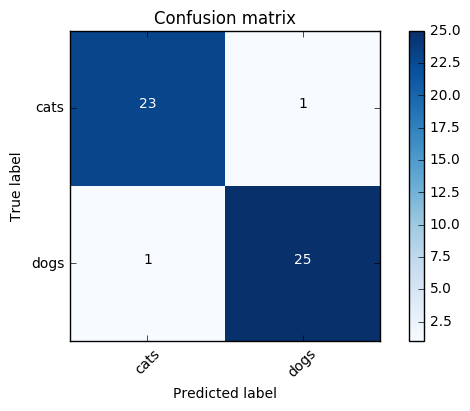

In [124]:
plot_confusion_matrix(cm, val_batches.class_indices)

## Submit Predictions to Kaggle!

#### Kaggle's submission requirement

Here's the format Kaggle requires for new submissions:
```
imageId,isDog
1242, .3984
3947, .1000
4539, .9082
2345, .0000
```

Kaggle wants the imageId followed by the probability of the image being a dog. Kaggle uses a metric called [Log Loss](http://wiki.fast.ai/index.php/Log_Loss) to evaluate your submission.

#### Load our test predictions from file

In [142]:
preds = load_array(results_path + 'test_preds.dat')
filenames = load_array(results_path + 'filenames.dat')

#### Grab the dog prediction column

In [130]:
isdog = preds[:,1]
print "Raw Predictions: " + str(isdog[:5])
print "Mid Predictions: " + str(isdog[(isdog < .6) & (isdog > .4)])
print "Edge Predictions: " + str(isdog[(isdog == 1) | (isdog == 0)])

Raw Predictions: [  1.0000e+00   0.0000e+00   7.1264e-14   1.0000e+00   1.1937e-40]
Mid Predictions: []
Edge Predictions: [ 1.  0.  1.  1.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  0.]


### visualizing log loss function

#### What is log function and how it behave

[Log Loss](http://wiki.fast.ai/index.php/Log_Loss) doesn't support probability values of 0 or 1--they are undefined (and we have many). Fortunately, Kaggle helps us by offsetting our 0s and 1s by a very small value. So if we upload our submission now we will have lots of .99999999 and .000000001 values. This seems good, right?

Not so. There is an additional twist due to how log loss is calculated--log loss rewards predictions that are confident and correct (p=.9999,label=1), but it punishes predictions that are confident and wrong far more (p=.0001,label=1). See visualization below.

#### Provided plotting function not working, I have to alter a little

In [ ]:
# y_true must have two different labels
log_loss([0,1],[[0.0001, 0.9999],[0.9999, 0.0001]], eps=1e-15)

In [ ]:
log_loss([1,0],[[0.9, 0.1],[0.9, 0.1]], eps=1e-15)

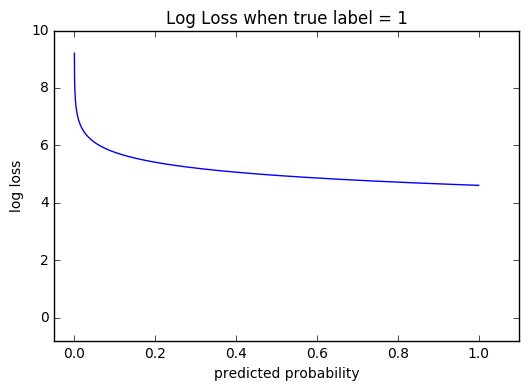

In [132]:
#Visualize Log Loss when True value = 1
#y-axis is log loss, x-axis is probabilty that label = 1
#As you can see Log Loss increases rapidly as we approach 0
#But increases slowly as our predicted probability gets closer to 1
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss

x = [i*.0001 for i in range(1,10000)] # 10000
y = [log_loss([0,1 if i > 0 else 0],[[0.0001, 0.9999],[1-(i*.0001), i*.0001]],eps=1e-15) for i in range(1,10000,1)]

plt.plot(x, y)
plt.axis([-.05, 1.1, -.8, 10])
plt.title("Log Loss when true label = 1")
plt.xlabel("predicted probability")
plt.ylabel("log loss")

plt.show()

#### Provided plotting function (not working)

```
x = [i*.0001 for i in range(1,10000)]
y = [log_loss([1],[[i*.0001,1-(i*.0001)]],eps=1e-15) for i in range(1,10000,1)]

plt.plot(x, y)
plt.axis([-.05, 1.1, -.8, 10])
plt.title("Log Loss when true label = 1")
plt.xlabel("predicted probability")
plt.ylabel("log loss")

plt.show()
```

### To play safe: need avoid log loss large reward and huge penality

In [53]:
#So to play it safe, we use a sneaky trick to round down our edge predictions
#Swap all ones with .95 and all zeros with .05
isdog = isdog.clip(min=0.05, max=0.95)

### Format and submit result as Kaggle requires

#### Get image index first

```
for f in filenames:
    print f[8:f.find('.')]
```

In [148]:
#Extract imageIds from the filenames in our test/unknown directory 
filenames = batches.filenames
ids = np.array([int(f[8:f.find('.')]) for f in filenames])

In [150]:
# ids

#### Join image index and predictions into a dataframe

Here we join the two columns into an array of [imageId, isDog]

In [55]:
subm = np.stack([ids,isdog], axis=1)
subm[:5]

array([[  1.0324e+04,   9.5000e-01],
       [  1.0910e+04,   5.0000e-02],
       [  1.1756e+04,   5.0000e-02],
       [  1.1984e+04,   9.5000e-01],
       [  1.2135e+04,   5.0000e-02]])

#### Save results in specific file name, format, and headers

In [56]:
%cd $DATA_HOME_DIR
submission_file_name = 'submission1.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

/Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1/data/redux


#### Download the submission file and upload to kaggle normally

In [57]:
from IPython.display import FileLink
%cd $LESSON_HOME_DIR
FileLink('data/redux/'+submission_file_name)

/Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1


/Users/Natsume/Documents/ml-python-r-weka/dl_fast/lesson1/data/redux/submission1.csv

You can download this file and submit on the Kaggle website or use the Kaggle command line tool's "submit" method.